In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [2]:
import pandas as pd
import numpy as np

In [3]:
dynamic_data = pd.read_csv('sph_dynamic.csv')

In [4]:
static_data = pd.read_csv('sph_static.csv')

In [5]:
# Missing Values in Dynamic Table
dynamic_data.isnull().sum()

stay_id                   0
charttime                 0
total_protein          6930
calcium                 933
creatinine              261
glucose                 444
sodium                  214
chloride                241
heart_rate             6833
sbp                    6895
dbp                    6895
mbp                    6887
resp_rate              6832
temperature            6974
hemoglobin             1179
wbc                    1207
alt                    3964
ast                    3936
alp                    3976
bilirubin_total        3957
bilirubin_direct       6808
bilirubin_indirect     6812
ph                     7004
lactate                7012
pt                     3068
urineoutput            6942
sofa_respiration       7005
sofa_coagulation       7023
sofa_liver             7023
sofa_cardiovascular    6872
sofa_cns               6979
sofa_renal             7024
dtype: int64

In [6]:
# Drop the columns with more than 80%
for col in dynamic_data.columns:
    if dynamic_data[col].isnull().sum() > len(dynamic_data)*0.8:
        del dynamic_data[col]

In [7]:
dynamic_data.isnull().sum()

stay_id               0
charttime             0
calcium             933
creatinine          261
glucose             444
sodium              214
chloride            241
hemoglobin         1179
wbc                1207
alt                3964
ast                3936
alp                3976
bilirubin_total    3957
pt                 3068
dtype: int64

In [8]:
# ['alt','ast','alp','bilirubin_total','pt'] are liver function related test results
# create a new binary column 'liver_function_test', True/1 means have ever taken liver function test
liver_test_result = ['alt','ast','alp','bilirubin_total','pt']
def liver_categorize(group):
    flag = True
    for i in liver_test_result:
        if group[i].notnull().any():
            flag = False
    if flag:
        group['liver_function_test'] = False
    else:
        group['liver_function_test'] = True
    return group

dynamic_data = dynamic_data.groupby('stay_id').apply(liver_categorize)

/var/folders/hz/y0b7zd116rs3w_v_g_pxz33c0000gn/T/ipykernel_9906/240455136.py:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dynamic_data = dynamic_data.groupby('stay_id').apply(liver_categorize)


In [9]:
dynamic_data

stay_id                charttime  calcium  creatinine  glucose  sodium  \
0     35715575  2148-12-27 18:15:00.000      8.5         0.9    137.0   138.0   
1     34483718  2118-01-04 03:58:00.000      8.2         0.8    129.0   141.0   
2     31826892  2163-03-10 19:59:00.000      7.7         0.4    112.0   136.0   
3     36154799  2131-12-02 19:14:00.000      NaN         NaN      NaN     NaN   
4     32732521  2116-08-12 12:45:00.000      NaN         4.0    135.0   139.0   
...        ...                      ...      ...         ...      ...     ...   
7019  31292653  2192-03-18 03:14:00.000      NaN         1.4    102.0   137.0   
7020  32964221  2127-01-30 10:00:00.000      8.6         0.5    112.0   139.0   
7021  33493321  2142-07-28 06:02:00.000      NaN         1.1    130.0   142.0   
7022  38658392  2189-05-17 00:13:00.000      7.3         1.0    174.0   133.0   
7023  37805633  2172-07-28 21:25:00.000      8.3         0.9    155.0   144.0   

      chloride  hemoglobin   wbc   alt   ast    alp  bilirubin_total    pt  \
0        104.0         NaN   NaN   NaN   NaN    NaN              NaN   NaN   
1        101.0         8.7  11.3   NaN   NaN    NaN              NaN  12.1   
2         98.0         NaN   NaN   NaN   NaN    NaN              NaN   NaN   
3          NaN        12.3   NaN   NaN   NaN    NaN              NaN   NaN   
4        105.0         NaN   NaN   NaN   NaN    NaN              NaN   NaN   
...        ...         ...   ...   ...   ...    ...              ...   ...   
7019     103.0         8.7   4.9   NaN   NaN    NaN              NaN   NaN   
7020     107.0         8.9  14.3  14.0  32.0  148.0              2.6   NaN   
7021     105.0         8.4   4.0   NaN   NaN    NaN              NaN   NaN   
7022      93.0        13.0  19.5   9.0  18.0   48.0              0.5  13.0   
7023     110.0        12.1   5.4   NaN   NaN    NaN              NaN   NaN   

      liver_function_test  
0                    True  
1                    True  
2                    True  
3                    True  
4                    True  
...                   ...  
7019                 True  
7020                 True  
7021                 True  
7022                 True  
7023                False  

[7024 rows x 15 columns]

In [10]:
dynamic_data.describe()

stay_id      calcium   creatinine      glucose       sodium  \
count  7.024000e+03  6091.000000  6763.000000  6580.000000  6810.000000   
mean   3.497892e+07     8.389640     1.644019   142.289666   137.309545   
std    2.832325e+06     0.820066     1.839893    89.875986     5.638384   
min    3.000414e+07     4.200000     0.100000    30.000000    83.000000   
25%    3.255070e+07     7.900000     0.800000   102.000000   134.000000   
50%    3.496990e+07     8.400000     1.100000   125.000000   138.000000   
75%    3.746081e+07     8.900000     1.800000   159.000000   141.000000   
max    3.999217e+07    12.300000    19.700000  2970.000000   185.000000   

          chloride   hemoglobin          wbc           alt           ast  \
count  6783.000000  5845.000000  5817.000000   3060.000000   3088.000000   
mean    102.067079    10.043353    10.973130    161.859150    243.882772   
std       6.731008     2.177573     8.228807    752.898832   1216.527439   
min      62.000000     3.900000     0.100000      1.000000      5.000000   
25%      98.000000     8.400000     5.900000     17.000000     22.000000   
50%     102.000000     9.800000     9.400000     30.000000     42.000000   
75%     106.000000    11.400000    14.200000     62.000000     95.000000   
max     153.000000    18.400000   125.200000  15018.000000  28275.000000   

               alp  bilirubin_total           pt  
count  3048.000000      3067.000000  3956.000000  
mean    131.933727         4.248745    18.826567  
std     123.088598         7.808056    11.588015  
min       7.000000         0.100000     9.200000  
25%      65.000000         0.500000    12.800000  
50%      92.000000         1.000000    14.900000  
75%     149.000000         3.600000    20.400000  
max    1185.000000        52.600000   150.000000

In [ ]:
# Assume that patients with no relevant results recorded don't have liver issues
# so we impute these patients' missing values of these columns with random number in normal range

# but i can not find the unit and normal range for them so i drop them first >_<
# dynamic_data.drop(['alt','ast','alp','bilirubin_total','pt'], axis = 1, inplace = True)

In [11]:
dynamic_data.isnull().sum()

stay_id                   0
charttime                 0
calcium                 933
creatinine              261
glucose                 444
sodium                  214
chloride                241
hemoglobin             1179
wbc                    1207
alt                    3964
ast                    3936
alp                    3976
bilirubin_total        3957
pt                     3068
liver_function_test       0
dtype: int64

In [12]:
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alt'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'ast'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alp'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'bilirubin_total'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'pt'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: alt, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ast, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: alp, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: bilirubin_total, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pt, dtype: float64


In [13]:
# use KNN to impute the rest
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 10)
dynamic_data.iloc[:,2:] = imputer.fit_transform(dynamic_data.iloc[:,2:])

In [14]:
# define normal ranges for each column
normal_ranges = {
    'alt': (5, 40),
    'ast': (10, 35),
    'alp': (40, 130),
    'bilirubin_total': (0.1, 1.0),
    'pt': (9.5, 13.5)
}


In [15]:
mask = dynamic_data['liver_function_test'] == False
n_no_test = mask.sum()
def sample_normal(col):
    lower = normal_ranges[col][0]
    upper = normal_ranges[col][1]
    return np.random.normal(loc=(lower+upper)/2, scale=(upper-lower)/6, size=n_no_test)

sampled_alt = sample_normal("alt")
sampled_ast = sample_normal("ast")
sampled_alp = sample_normal("alp")
sampled_bilirubin_total = sample_normal("bilirubin_total")
sampled_pt = sample_normal("pt")
dynamic_data.loc[mask, 'alt'] = sampled_alt
dynamic_data.loc[mask, 'ast'] = sampled_ast
dynamic_data.loc[mask, 'alp'] = sampled_alp
dynamic_data.loc[mask, 'bilirubin_total'] = sampled_bilirubin_total
dynamic_data.loc[mask, 'pt'] = sampled_pt

In [16]:
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alt'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'ast'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alp'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'bilirubin_total'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'pt'].describe())

count    349.000000
mean      22.282695
std        5.729923
min        3.818950
25%       18.488852
50%       21.973560
75%       25.894147
max       38.558272
Name: alt, dtype: float64
count    349.000000
mean      22.377674
std        4.062523
min        8.533215
25%       19.768029
50%       22.251798
75%       25.333243
max       33.042002
Name: ast, dtype: float64
count    349.000000
mean      84.541168
std       15.478818
min       49.462781
25%       73.076877
50%       84.473577
75%       95.337643
max      122.963969
Name: alp, dtype: float64
count    349.000000
mean       0.548895
std        0.161584
min        0.125364
25%        0.432609
50%        0.555915
75%        0.663208
max        1.016933
Name: bilirubin_total, dtype: float64
count    349.000000
mean      11.515924
std        0.704308
min        9.822746
25%       11.022552
50%       11.482891
75%       11.974206
max       13.963548
Name: pt, dtype: float64


In [17]:
#to address the same patinent have differrent results at the same charttime
dynamic_data = dynamic_data.groupby(['stay_id','charttime']).mean().reset_index()

In [18]:
#compute the gradient
def count_gradient(group):
    testresult = list(dynamic_data.columns)[2:-1]
    for i in testresult:
        if len(group) == 1:
            group[i+'_grad'] = 0
        else:
            time_diff = (group['charttime'].iloc[-1] - group['charttime'].iloc[-2]).total_seconds()
            group[i+'_grad'] = (group[i].iloc[-1] - group[i].iloc[-2]) / time_diff 
    return group

In [19]:
dynamic_data['charttime'] = pd.to_datetime(dynamic_data['charttime'])

In [20]:
dynamic_data.sort_values(by = ['stay_id','charttime'], inplace = True)
dynamic_data = dynamic_data.groupby('stay_id').apply(count_gradient)

/var/folders/hz/y0b7zd116rs3w_v_g_pxz33c0000gn/T/ipykernel_9906/3194640149.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dynamic_data = dynamic_data.groupby('stay_id').apply(count_gradient)


In [21]:
# take the last values of all timepoints for each patient
dynamic_data_last = dynamic_data.drop(['charttime'],axis = 1).groupby('stay_id').tail(1)

In [22]:
# merge dynamic and static table
data = static_data.merge(dynamic_data_last, on = 'stay_id')

In [ ]:
data

In [23]:
#Converting data type of icu_intime, vent_start and vent_end to date and time format
data['icu_intime'] = pd.to_datetime(data['icu_intime'])
data['vent_start'] = pd.to_datetime(data['vent_start'], format='%m/%d/%y %H:%M')
data['vent_end'] = pd.to_datetime(data['vent_end'], format='%m/%d/%y %H:%M')

In [ ]:
data

In [ ]:
data.dtypes

In [24]:
# Categorize vent_duration 
data['vent_duration_category'] = pd.cut(data['vent_duration'], bins=[0,4,8,12,16,20,24,36,48,72,np.inf],
                                         labels=['0-4 hours', '4-8 hours', '8-12 hours', '12-16 hours',
                                                 '16-20 hours', '20-24 hours', '24-36 hours', '36-48 hours',
                                                 '48-72 hours','over 72 hours'])


In [25]:
data['vent_duration_category'].value_counts()

over 72 hours    294
4-8 hours        249
8-12 hours       217
12-16 hours      203
24-36 hours      194
16-20 hours      182
0-4 hours        158
48-72 hours      155
36-48 hours      148
20-24 hours      123
Name: vent_duration_category, dtype: int64

<Axes: >

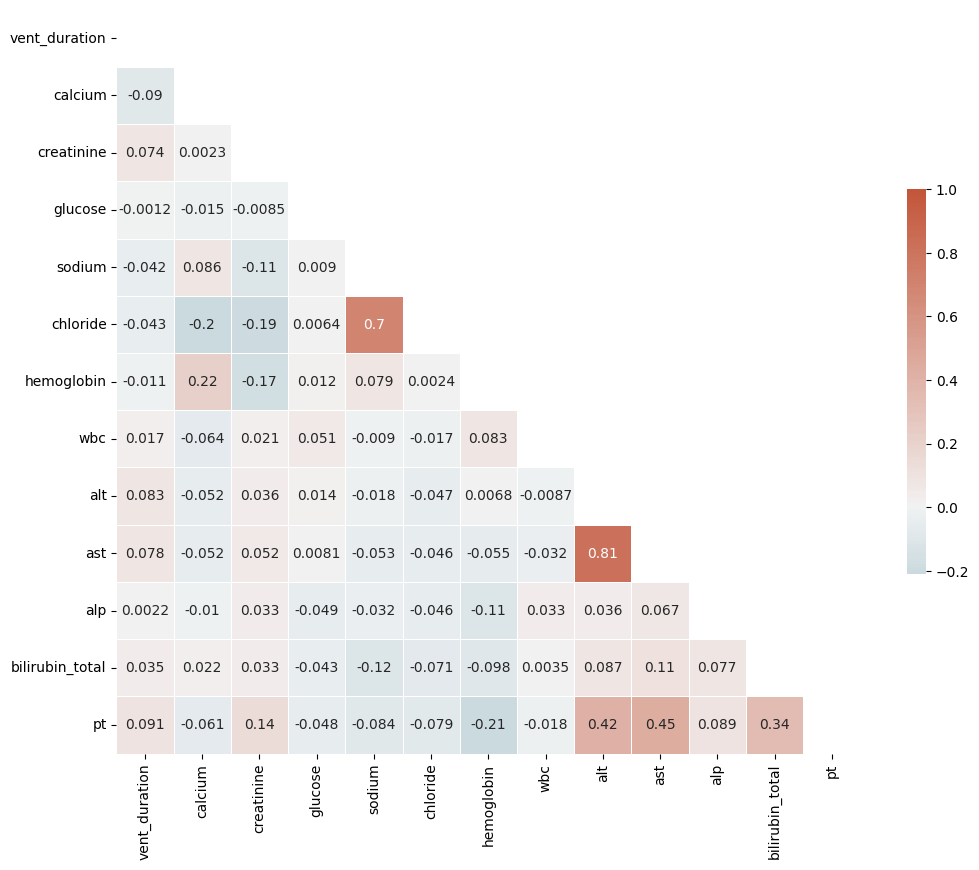

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
#Dropped icu_intime, vent_start and vent_end as they are usable for correlation
#Creating correlation matrix to observe the relationship between variables
df_corr = data.loc[:,'vent_duration':'pt'].corr()

#Setting up plots
f, ax = plt.subplots(figsize=(12,10))

#Setting up lower triangle correlation matrix
mask = np.triu(np.ones(df_corr.shape), k=0).astype(bool)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


In [ ]:
#Plotting pairplot to assess the relationship and distribution of each variable. 
sns.pairplot(data.loc[:,'vent_duration':'pt'])

Original Shape: (1923, 31)
Trimmed Shape: (1293, 31)


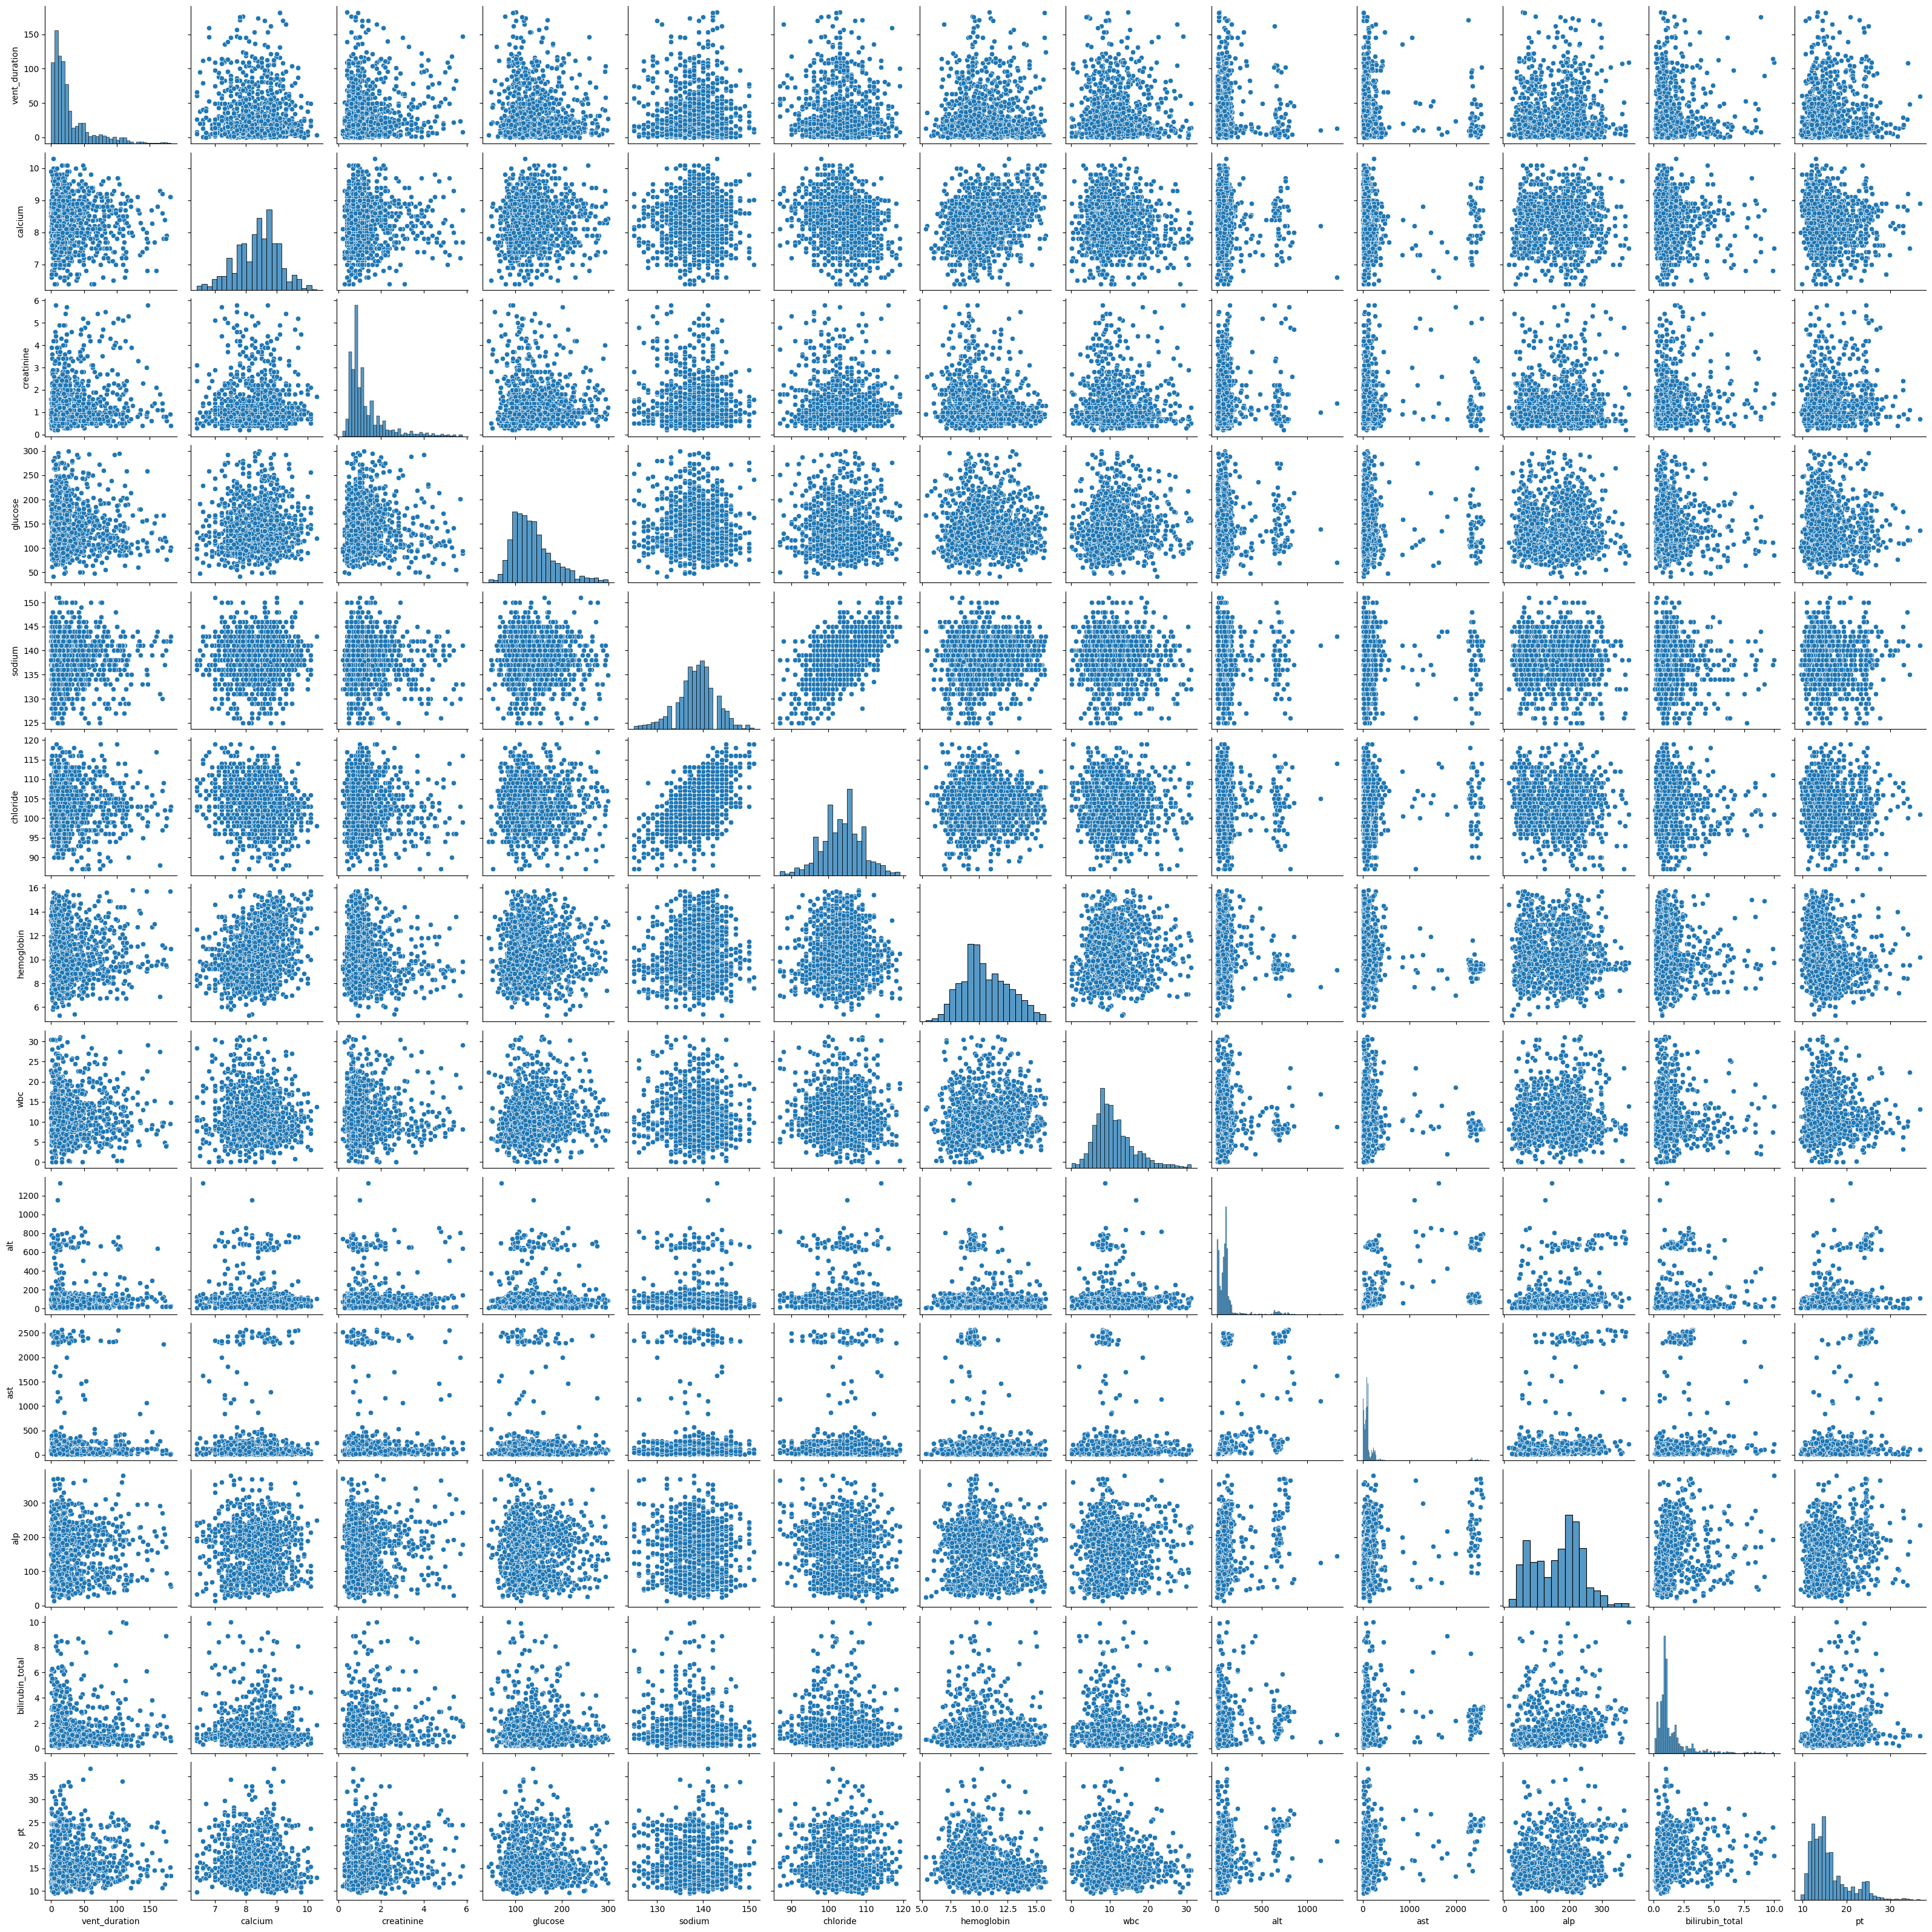

In [27]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

# Scale the numeric columns using StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data[numeric_cols])

# Create a new dataframe with the scaled numeric columns
scaled_df = pd.DataFrame(scaled_df, columns=numeric_cols, index=data.index)

# Identify outliers with z-scores greater than 2.5 or less than -2.5 (95%)
z_scores = (scaled_df - scaled_df.mean()) / scaled_df.std()
outliers = data[(z_scores > 2.5).any(axis=1) | (z_scores < -2.5).any(axis=1)]

# Remove outliers from the original dataframe
trimmed_df = data.drop(outliers.index)

print("Original Shape:", data.shape)
print("Trimmed Shape:", trimmed_df.shape)
print(sns.pairplot(trimmed_df.loc[:,'vent_duration':'pt']))

<Axes: >

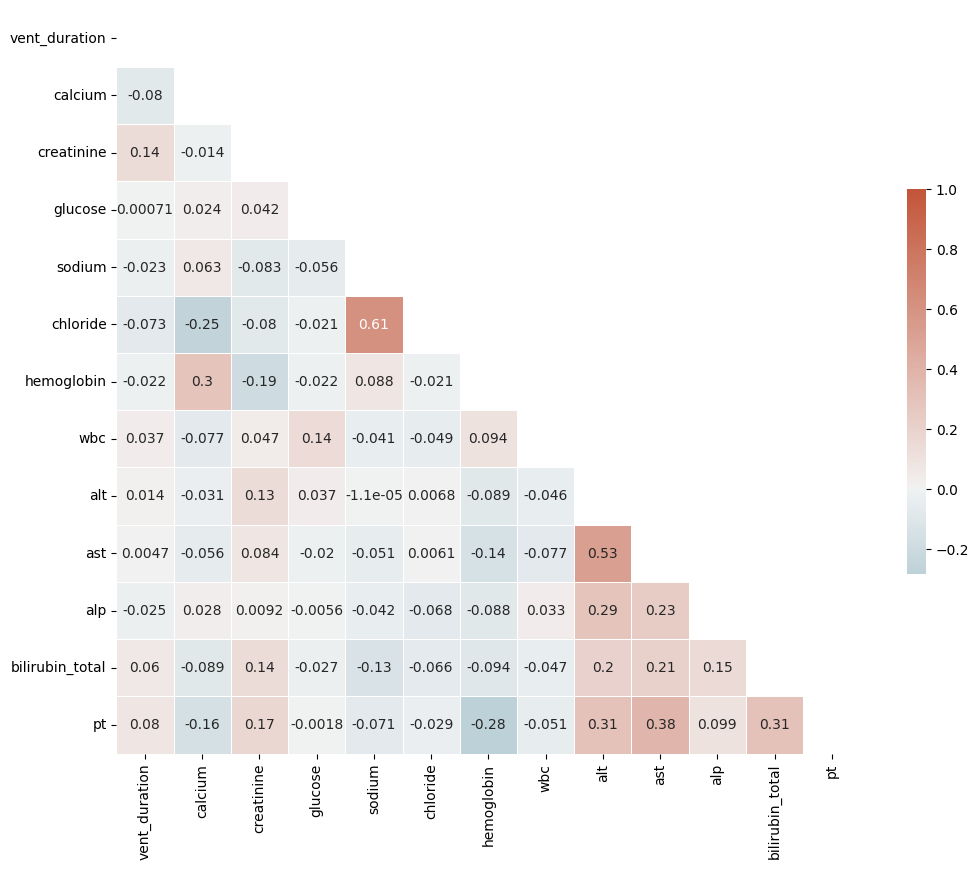

In [28]:
#Creating correlation matrix to observe the relationship between variables
trimmed_df_corr = trimmed_df.loc[:,'vent_duration':'pt'].corr()

#Setting up plots
f, ax = plt.subplots(figsize=(12,10))

#Setting up lower triangle correlation matrix
mask = np.triu(np.ones(trimmed_df_corr.shape), k=0).astype(bool)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(trimmed_df_corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


In [29]:
trimmed_df['vent_duration_category'].value_counts()

4-8 hours        181
8-12 hours       164
over 72 hours    144
12-16 hours      142
24-36 hours      137
16-20 hours      129
0-4 hours        120
48-72 hours      101
36-48 hours       92
20-24 hours       83
Name: vent_duration_category, dtype: int64

## To Discuss
### Correlation (Before trimming)
To consider dropping either of the variable that is highly correlated, to minimise over fitting. 
- Chloride and sodium have a very strong relationship with each other (0.71)
- ast and alt also have a very strong relationship with each other (0.85)

### Correlation (After trimming)
The relationship between Chloride and sodium have reduced after trimming the outliers from 0.71 to 0.63.
Not a very big change, so correlation not driven by outliers

However, for ast and alt though still one of the highly correlated variable. The correlation measured dropped from 0.85 to 0.55.
So the previous correlation is likely driven by the outliers. 

The caveat here is also we are assuming that the relationship across variables are linear. 

### Outliers (Concluded to exclude note exclude this in pre-processing but can be done for respective models.)
Rows with outlier observed were dropped. While that will reduce the sample size, but outlier can cause model to not perform well.
Currently the outliers were trimmed based on z-scores of -2.5 to 2.5.